In [2]:
import numpy as np
import pickle
from TFHelp import *
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import seaborn as sb
import sympy

In [3]:
delimiter = ","
TFAVariable = [[float(y) for y in x.split(delimiter)] for x in open("TFVAResultSignConst.csv","r").readlines()]
TFVARange = pickle.load(open("TFVAResultSignConstRange.pkl","rb"))
TFVAQuality = pickle.load(open("TFVAResultSignConstQuality.pkl","rb"))
matrix = [[float(y) for y in x.split(delimiter)] for x in open("TFA_CSMatrices/learnedTFAvalSignConst.csv","r").readlines()]
CSMatrix =  [[float(y) for y in x.split(delimiter)] for x in open("TFA_CSMatrices/learnedCSvalSigned.csv","r").readlines()]

44
['ygl071w', 0.2828, -0.1183, 11]
['ylr256w', 0.1359, -0.0815, 29]
['yhr124w', -0.0953, -0.0481, 14]
['ylr403w', 0.0808, -0.0373, 30]
['ydr034c', 0.0792, -0.0799, 4]
['yel009c', -0.0705, -0.0344, 8]
['yfr034c', -0.0653, -0.0312, 10]
['ypl202c', -0.0596, -0.0508, 41]
['yil101c', 0.0488, -0.0214, 16]
['yhr178w', -0.0471, -0.0818, 15]
['yor358w', -0.0338, -0.0272, 38]
['ylr176c', -0.0254, -0.0118, 27]
['ycr065w', -0.0188, -0.0051, 1]
['ypr065w', -0.0131, -0.0012, 43]
['yhr084w', 0.0093, -0.0026, 13]
['ykl185w', 0.0039, -0.0158, 24]
['yjl056c', 0.0015, -0.0035, 20]
['yir013c', 0.0013, -0.0038, 18]
['ydl020c', 0.0006, -0.0014, 2]
['ynl027w', -0.0003, -0.0008, 32]
['yjr060w', 0.0001, -0.0, 22]
['ypl248c', 0.0001, -0.0012, 42]
['yal051w', -0.0, -0.0, 0]
['ydl106c', 0.0, 0.0, 3]
['ydr146c', -0.0, 0.0, 5]
['ydr213w', 0.0, 0.0, 6]
['ydr310c', -0.0, 0.0, 7]
['yfl031w', 0.0, -0.0, 9]
['yhl020c', 0.0, 0.0, 12]
['yil131c', -0.0, -0.0, 17]
['yir017c', 0.0, 0.0, 19]
['yjl110c', 0.0, 0.0, 21]
['ykl10

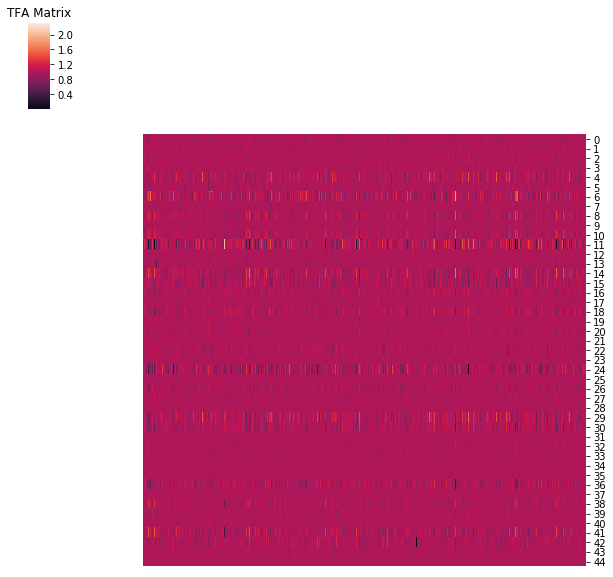

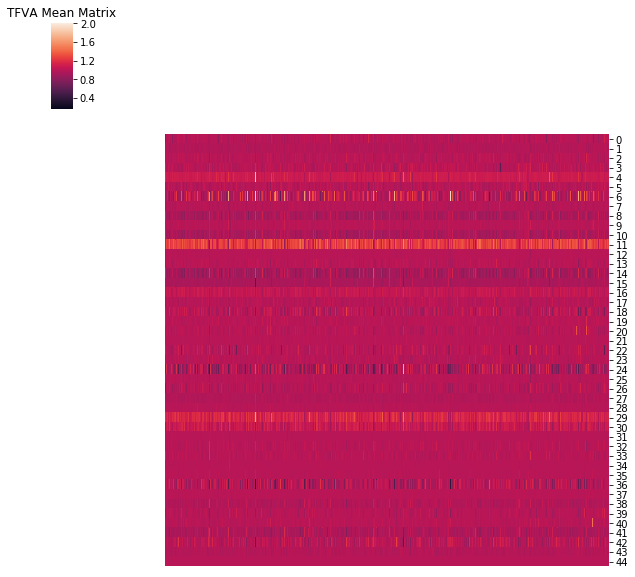

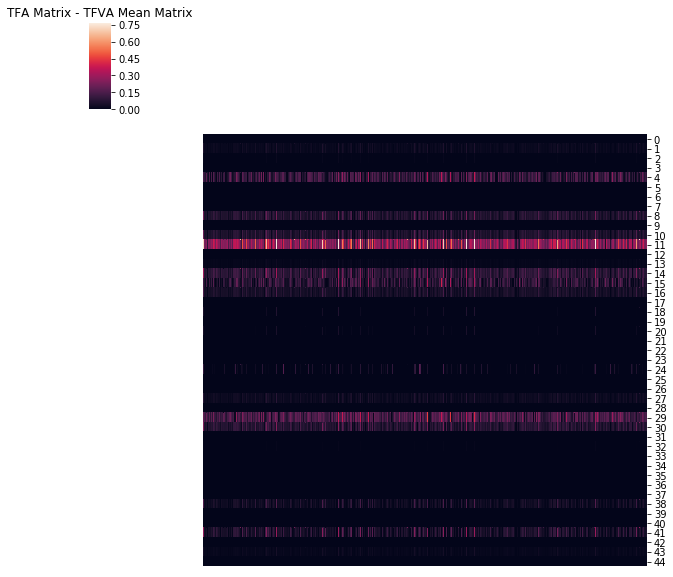

In [23]:
sb.clustermap(matrix,row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFA Matrix")
sb.clustermap(TFAVariable,row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFVA Mean Matrix")
sb.clustermap(np.abs(np.subtract(matrix,TFAVariable)),row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFA Matrix - TFVA Mean Matrix")

#get row labels for matrix
rowLabelFile = "TFListZev.csv"
TFs = [str.lower(x.rstrip())[1:-1] for x in open(rowLabelFile,"r").readlines()]
print(len(TFs)) #should be 44


diffMat = np.subtract(matrix,TFAVariable)
TFDifferences = [[TFs[row],np.round(np.mean(TFAVariable[row])-np.mean(matrix[row]),4),np.round(np.std(TFAVariable[row])-np.std(matrix[row]),4),row] for row in range(len(diffMat)-1)]
TFDifferences.sort(key = lambda x:abs(x[1]),reverse = True)
for diff in TFDifferences: print diff
                                                        


Text(0.5,1,'3 = disjoint\n2 = |Intersection| != 0\n 1 = Proper Subset\n 0 = Identical')

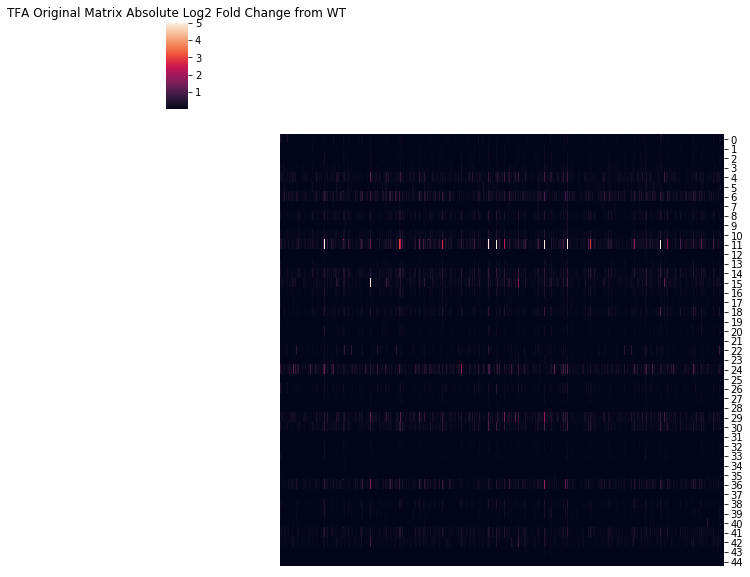

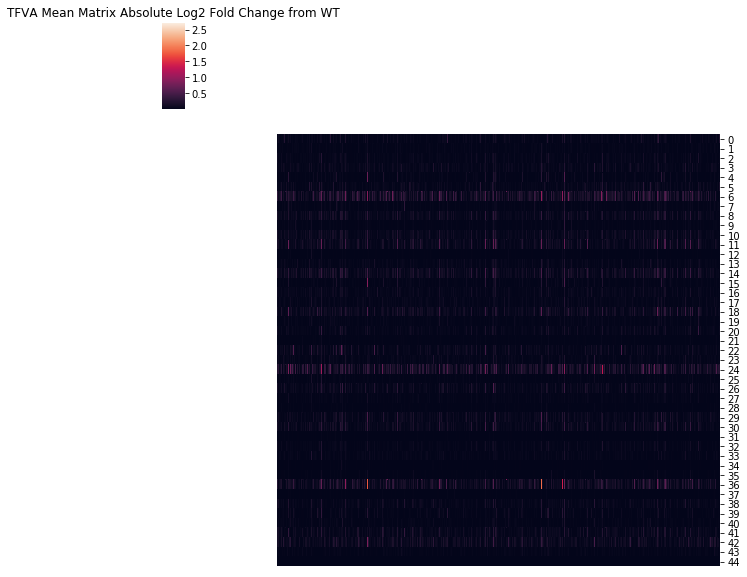

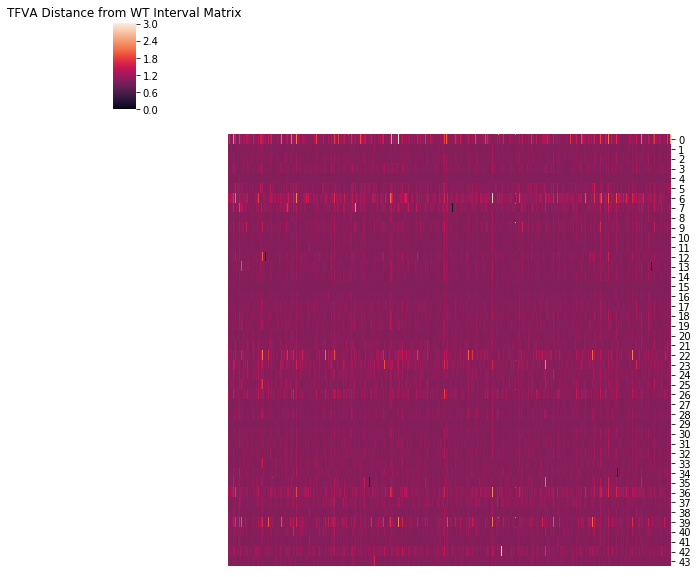

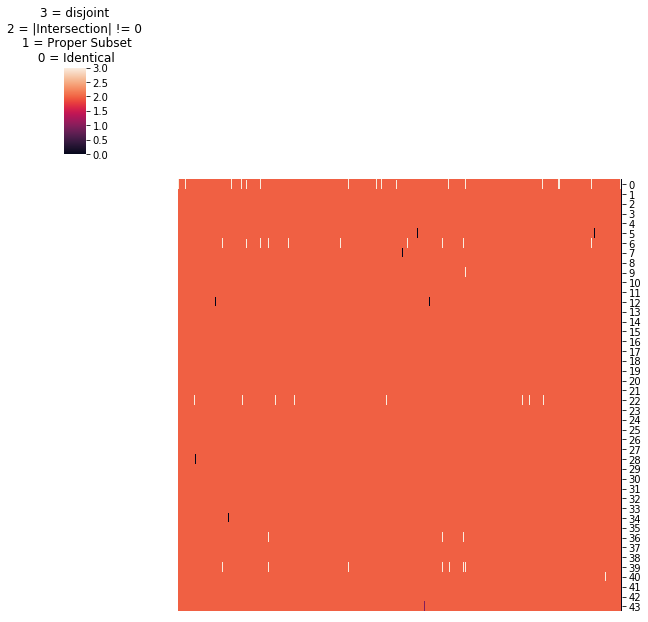

In [10]:
TFADistance = TFAHelper.distFromWTRange(TFVARange[:-1])
TFAFoldChange = np.clip([[abs(np.log2(col/row[-1])) for col in row] for row in TFAVariable],.001,None)
TFAFoldChangeOriginal = np.clip([[abs(np.log2(col/row[-1])) for col in row] for row in matrix],.001,5.0)
sb.clustermap((TFAFoldChangeOriginal),row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFA Original Matrix Absolute Log2 Fold Change from WT")
sb.clustermap((TFAFoldChange),row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFVA Mean Matrix Absolute Log2 Fold Change from WT")
sb.clustermap(TFADistance,row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("TFVA Distance from WT Interval Matrix")
sb.clustermap(TFAHelper.BinDistMatrixV(TFADistance),row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
plt.title("3 = disjoint\n2 = |Intersection| != 0\n 1 = Proper Subset\n 0 = Identical")

Negative = found solution for upper bound and lower bound has a mean error from the true GE better
 than the error from the original factorization


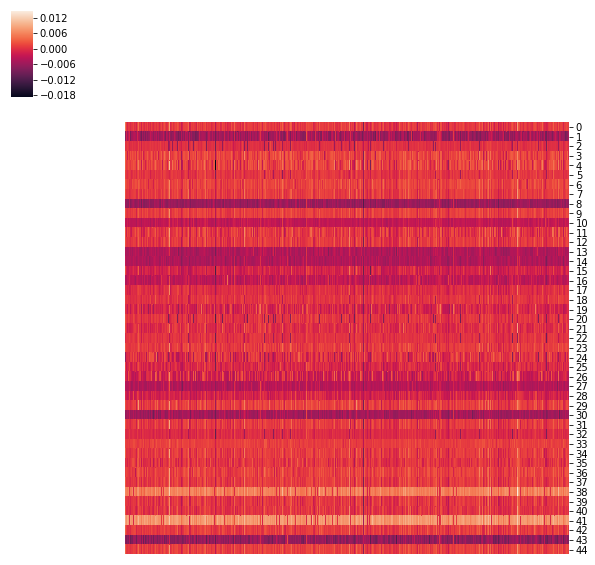

In [6]:
TFVAQuality = [[np.mean(col) for col in row] for row in TFVAQuality]
sb.clustermap(TFVAQuality,row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=1)
print("Negative = found solution for upper bound and lower bound has a mean error from the true GE better\n than the error from the original factorization")

['ygl071w', 2.0, 0.02, 11, 1, 16.83]
['ylr256w', 1.99, 0.06, 29, 0, 4.15]
['ydr034c', 1.98, 0.08, 4, 0, 9.35]
['yhr178w', 1.98, 0.07, 15, 0, 16.88]
['ykl185w', 1.66, 0.21, 24, 3, 1.44]
['yhr124w', 1.62, 0.23, 14, 0, 49.85]
['ypl202c', 1.35, 0.18, 41, 0, 31.72]
['yel009c', 1.14, 0.14, 8, 1, 59.93]
['yfr034c', 1.13, 0.13, 10, 5, 15.65]
['ylr403w', 1.07, 0.05, 30, 4, 101.52]
['yir013c', 1.03, 0.09, 18, 0, 23.34]
['yor358w', 0.93, 0.09, 38, 0, 12.46]
['yil101c', 0.85, 0.04, 16, 1, 5.15]
['yjl056c', 0.66, 0.02, 20, 2, 8.6]
['ypl248c', 0.61, 0.06, 42, 1, 7.36]
['yol108c', 0.59, 0.11, 36, 1, 16.71]
['ydr213w', 0.55, 0.08, 6, 0, 12.45]
['ydl106c', 0.53, 0.02, 3, 0, 6.3]
['ylr176c', 0.51, 0.03, 27, 0, 10.23]
['yhr084w', 0.49, 0.02, 13, 3, 9.79]
['ycr065w', 0.46, 0.03, 1, 1, 17.85]
['ydl020c', 0.46, 0.01, 2, 0, 50.91]
['yil131c', 0.43, 0.01, 17, 2, 46.32]
['ydr146c', 0.4, 0.04, 5, 1, 6.56]
['ynl027w', 0.4, 0.01, 32, 9, 65.75]
['ypr065w', 0.4, 0.02, 43, 1, 8.94]
['ylr013w', 0.39, 0.02, 26, 0, 25.

Text(0.5,0,'TF CS Sum')

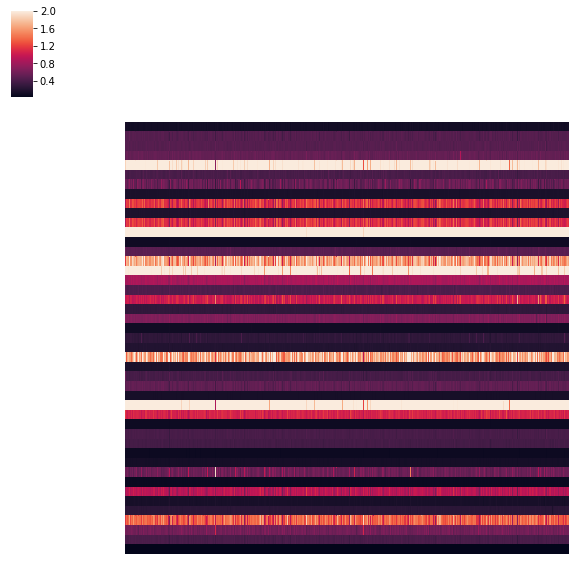

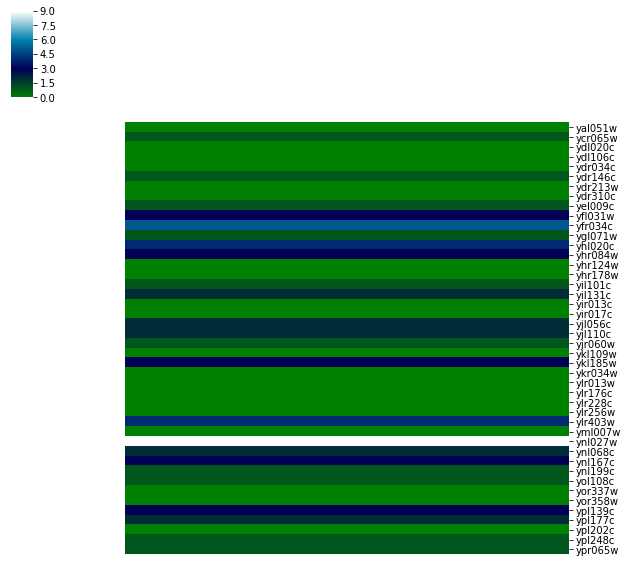

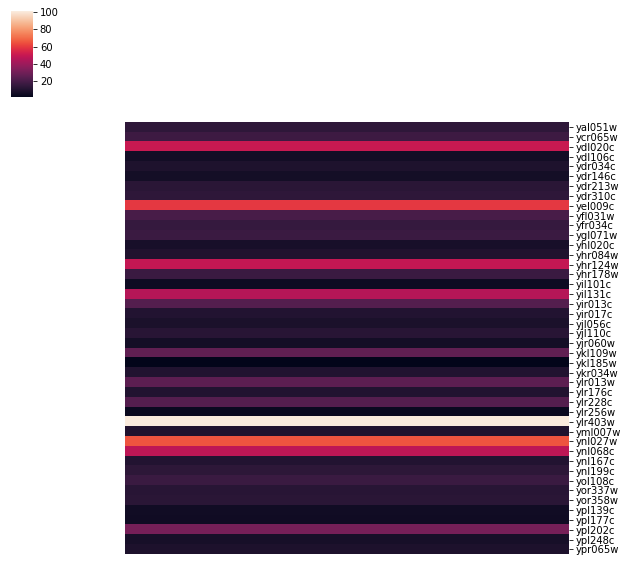

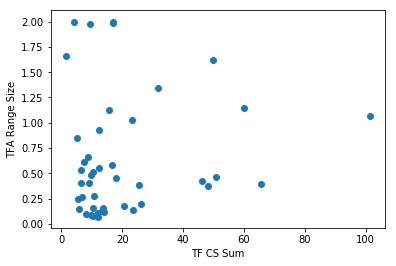

In [20]:
# Look at relative size of TFA Range compared to found TFA value

#get expected interactions
expectedResults = [x.rstrip().split()[:3] for x in open("../SelectedData/kinaseTFInteractionsWQuantititation.txt","r").readlines()[1:]]
expectedResults = [tf for kinase,tf,score in expectedResults]
#interactions = {tf:len([tf1 for tf1 in expectedResults if tf1 == tf]) for tf in TFs}
interactions = [[len([tf1 for tf1 in expectedResults if tf1 == tf])] for tf in TFs]

file = open("TFA_CSMatrices/learnedCSvalSigned.csv","r")
delimiter = ","
CS = [[float(y) for y in x.split(delimiter)] for x in file.readlines()]
CSColSums = [[np.sum(np.abs(row))] for row in np.transpose(CS)[:-1]]


TFARangeSize = [[(max(col1)-min(col1))/col2 for col1,col2 in zip(row1,row2)] for row1,row2 in zip(TFVARange,TFAVariable)]
sb.clustermap(TFARangeSize,row_cluster=False,col_cluster = False,xticklabels = False,yticklabels=False)
sb.clustermap(interactions,row_cluster=False,col_cluster = False,xticklabels = False, yticklabels=TFs,cmap="ocean")
sb.clustermap(CSColSums,row_cluster=False,col_cluster = False,xticklabels = False, yticklabels=TFs)


TFARange = [[TFs[row],np.round(np.mean(TFARangeSize[row]),2),np.round(np.std(TFARangeSize[row]),2),row,interactions[row][0],np.round(CSColSums[row][0],2)] for row in range(len(TFARangeSize)-1)]

TFARange.sort(key = lambda x:x[1], reverse = True)
for tf in TFARange: print(tf)
# about 1/4 of the TFs have a range that makes their individual values meaningless
plt.figure()
plt.scatter([x[0] for x in CSColSums[:]],np.mean(TFARangeSize,1)[:-1])
plt.ylabel("TFA Range Size")
plt.xlabel("TF CS Sum")
